In [1]:
import igraph as ig
import json
import matplotlib.pyplot as plt
from random import randint

In [2]:
import os
import sys

sys.path

['C:\\Users\\volpato\\AppData\\Local\\Programs\\Python\\Python313\\python313.zip',
 'C:\\Users\\volpato\\AppData\\Local\\Programs\\Python\\Python313\\DLLs',
 'C:\\Users\\volpato\\AppData\\Local\\Programs\\Python\\Python313\\Lib',
 'C:\\Users\\volpato\\AppData\\Local\\Programs\\Python\\Python313',
 'c:\\P\\backend\\.venv',
 '',
 'c:\\P\\backend\\.venv\\Lib\\site-packages',
 'c:\\P\\backend\\.venv\\Lib\\site-packages\\win32',
 'c:\\P\\backend\\.venv\\Lib\\site-packages\\win32\\lib',
 'c:\\P\\backend\\.venv\\Lib\\site-packages\\Pythonwin']

In [3]:
def add_relative_path(relative_path):
    path = os.path.abspath(os.path.join(relative_path))
    if path not in sys.path:
        sys.path.append(path)

def add_absolute_path(absolute_path):
    if absolute_path not in sys.path:
        sys.path.append(absolute_path)

add_absolute_path("C:\\P\\backend\\LambdaPY\\realtime_lcdi")
add_absolute_path("C:\\P\\backend\\LambdaPY\\graph_layer\\python")
add_absolute_path("C:\\P\\backend\\LambdaPY\\platform_comm_layer\\python")

sys.path

['C:\\Users\\volpato\\AppData\\Local\\Programs\\Python\\Python313\\python313.zip',
 'C:\\Users\\volpato\\AppData\\Local\\Programs\\Python\\Python313\\DLLs',
 'C:\\Users\\volpato\\AppData\\Local\\Programs\\Python\\Python313\\Lib',
 'C:\\Users\\volpato\\AppData\\Local\\Programs\\Python\\Python313',
 'c:\\P\\backend\\.venv',
 '',
 'c:\\P\\backend\\.venv\\Lib\\site-packages',
 'c:\\P\\backend\\.venv\\Lib\\site-packages\\win32',
 'c:\\P\\backend\\.venv\\Lib\\site-packages\\win32\\lib',
 'c:\\P\\backend\\.venv\\Lib\\site-packages\\Pythonwin',
 'C:\\P\\backend\\LambdaPY\\realtime_lcdi',
 'C:\\P\\backend\\LambdaPY\\graph_layer\\python',
 'C:\\P\\backend\\LambdaPY\\platform_comm_layer\\python']

In [4]:
SCGRAPH_PATH = "./sc_graph.json"

In [5]:
with open(SCGRAPH_PATH, "r") as f:
    g_data = json.load(f)

g = ig.Graph.DictList(g_data[0], g_data[1], directed=True, vertex_name_attr='name')
g.summary()

'IGRAPH DN-T 66 82 -- \n+ attr: avg_ori (v), company_id (v), company_name (v), latitude (v), location (v), longitude (v), manufacturer_supplier_id (v), n_orders (v), n_orders_by_carrier (v), n_rejections (v), name (v), orders (v), receiver_distance (v), site_id (v), type (v), v_id (v), avg_oti (e), avg_tmi (e), avg_wmi (e), distance (e), n_orders (e), n_orders_by_carrier (e), orders (e), source (e), target (e)'

In [6]:
sites = g.vs.select(type="SUPPLIER_SITE")
v_site = sites[randint(0, len(sites) - 1)]
for attr in v_site.attributes():
    print(f"{attr}: {type(v_site[attr])} = {v_site[attr]}")

v_id: <class 'int'> = 61
name: <class 'str'> = 7
type: <class 'str'> = SUPPLIER_SITE
location: <class 'str'> = SHENZHEN, GUANGDONG, CN
receiver_distance: <class 'float'> = 9280.147752206572
latitude: <class 'float'> = 22.54554
longitude: <class 'float'> = 114.0683
site_id: <class 'int'> = 7
company_id: <class 'int'> = 4
company_name: <class 'str'> = AUTO SUPPLY
manufacturer_supplier_id: <class 'int'> = 4
n_rejections: <class 'int'> = 0
n_orders: <class 'int'> = 1
avg_ori: <class 'float'> = 0.0
n_orders_by_carrier: <class 'dict'> = {'DHL': 1}
orders: <class 'list'> = [{'order_id': 43, 'manufacturer_order_id': 7074, 'tracking_number': '2522622410', 'carrier_name': 'DHL'}]


In [23]:
len([v for v in g.vs if v["type"] == "INTERMEDIATE"])

44

In [38]:
sum([v.degree(mode="in") for v in g.vs if v["type"] == "MANUFACTURER"])

3

In [7]:
intermediates = g.vs.select(type="INTERMEDIATE")
v_intermediate = intermediates[randint(0, len(intermediates) - 1)]
for attr in v_intermediate.attributes():
    print(f"{attr}: {type(v_intermediate[attr])} = {v_intermediate[attr]}")

v_id: <class 'int'> = 12
name: <class 'str'> = FORT WORTH, TEXAS, US
type: <class 'str'> = INTERMEDIATE
location: <class 'str'> = FORT WORTH, TEXAS, US
receiver_distance: <class 'float'> = 8649.623278450543
latitude: <class 'float'> = 32.72541
longitude: <class 'float'> = -97.32085
site_id: <class 'NoneType'> = None
company_id: <class 'NoneType'> = None
company_name: <class 'NoneType'> = None
manufacturer_supplier_id: <class 'NoneType'> = None
n_rejections: <class 'NoneType'> = None
n_orders: <class 'int'> = 2
avg_ori: <class 'float'> = 2.7416666666666663
n_orders_by_carrier: <class 'dict'> = {'FedEx': 2}
orders: <class 'list'> = [{'order_id': 5, 'manufacturer_order_id': 6046, 'tracking_number': '437446419489', 'carrier_name': 'FedEx'}, {'order_id': 16, 'manufacturer_order_id': 6143, 'tracking_number': '439295386515', 'carrier_name': 'FedEx'}, {'order_id': 16, 'manufacturer_order_id': 6143, 'tracking_number': '439295386515', 'carrier_name': 'FedEx'}, {'order_id': 5, 'manufacturer_order

In [8]:
v_manufacturer = g.vs.select(type="MANUFACTURER")[0]
for attr in v_manufacturer.attributes():
    print(f"{attr}: {type(v_manufacturer[attr])} = {v_manufacturer[attr]}")

v_id: <class 'int'> = 6
name: <class 'str'> = FAE
type: <class 'str'> = MANUFACTURER
location: <class 'str'> = GAZZANIGA, LOMBARDY, IT
receiver_distance: <class 'float'> = 0.0
latitude: <class 'float'> = 45.79339
longitude: <class 'float'> = 9.82976
site_id: <class 'NoneType'> = None
company_id: <class 'int'> = 1
company_name: <class 'str'> = FAE
manufacturer_supplier_id: <class 'NoneType'> = None
n_rejections: <class 'NoneType'> = None
n_orders: <class 'int'> = 98
avg_ori: <class 'float'> = 0.0
n_orders_by_carrier: <class 'dict'> = {'UPS': 69, 'DHL Express': 4, 'DHL': 12, 'FedEx': 13}
orders: <class 'list'> = [{'order_id': 84, 'manufacturer_order_id': 7815, 'tracking_number': '1ZR465910413354648', 'carrier_name': 'UPS'}, {'order_id': 52, 'manufacturer_order_id': 7325, 'tracking_number': '1ZR465910413315449', 'carrier_name': 'UPS'}, {'order_id': 61, 'manufacturer_order_id': 7467, 'tracking_number': '1ZR465910413323627', 'carrier_name': 'UPS'}, {'order_id': 70, 'manufacturer_order_id': 

In [9]:
e = g.es[randint(0, len(g.es) - 1)]
source = g.vs[e.source]
dest = g.vs[e.target]
print(f"Source: {source['name']} - {source['type']} (v_id: {source['v_id']})")
print(f"Destination: {dest['name']} -{dest['type']} (v_id: {dest['v_id']})")
for attr in e.attributes():
    print(f"{attr}: {type(e[attr])} = {e[attr]}")

Source: 6 - SUPPLIER_SITE (v_id: 16)
Destination: PEABODY, MASSACHUSETTS, US -INTERMEDIATE (v_id: 60)
distance: <class 'float'> = 0.0
avg_oti: <class 'float'> = 3.227777777777778
avg_tmi: <class 'float'> = 0.0
avg_wmi: <class 'float'> = 0.0
n_orders_by_carrier: <class 'dict'> = {'FedEx': 3}
orders: <class 'list'> = [{'order_id': 27, 'manufacturer_order_id': 6306, 'tracking_number': '772213033705', 'carrier_name': 'FedEx'}, {'order_id': 86, 'manufacturer_order_id': 7836, 'tracking_number': '882411492285', 'carrier_name': 'FedEx'}, {'order_id': 81, 'manufacturer_order_id': 7798, 'tracking_number': '882190737801', 'carrier_name': 'FedEx'}]
n_orders: <class 'int'> = 3
source: <class 'str'> = 6
target: <class 'str'> = PEABODY, MASSACHUSETTS, US


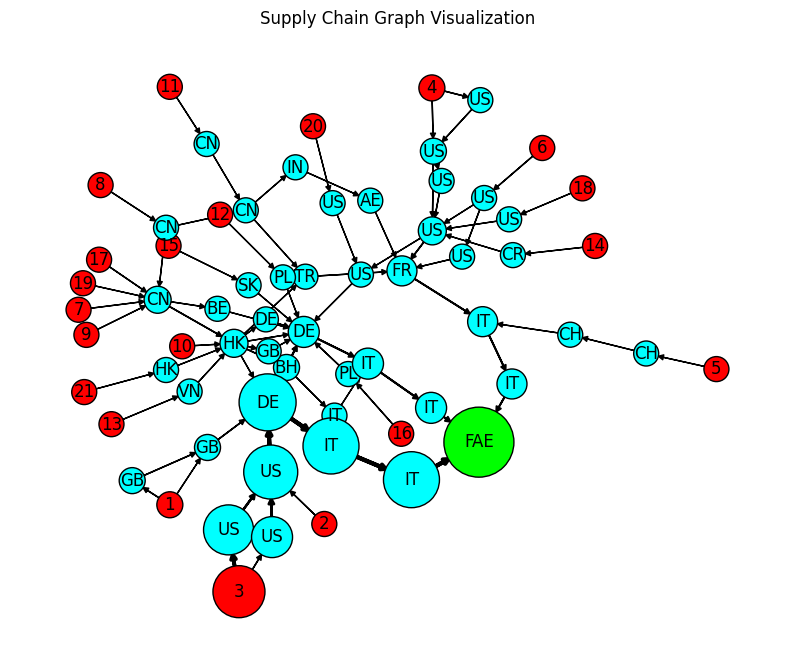

In [41]:
layout = g.layout("kk")

type_to_color = {
    "SUPPLIER_SITE": "red",
    "INTERMEDIATE": "cyan",
    "MANUFACTURER": "green"
    }

vertex_colors = [type_to_color[t] if t else "gray" for t in g.vs["type"]]
vertex_labels = [v['name'] if v['type'] != "INTERMEDIATE" else v['name'].split(",")[2].strip() for v in g.vs]

v_n_orders = g.vs["n_orders"]
min_size, max_size = 25, 70
vertex_sizes = [
    min_size + (max_size - min_size) * (n - min(v_n_orders)) / (max(v_n_orders) - min(v_n_orders))
    for n in v_n_orders
]

e_n_orders = g.es["n_orders"]
min_e_size, max_e_size = 1.0, 3.0
edge_sizes = [
    min_e_size + (max_e_size - min_e_size) * (n - min(e_n_orders)) / (max(e_n_orders) - min(e_n_orders))
    for n in e_n_orders
]

fig, ax = plt.subplots(figsize=(10, 8))
ig.plot(
    g,
    target=ax,
    layout=layout,
    vertex_label=vertex_labels,
    vertex_size=vertex_sizes,
    vertex_color=vertex_colors,
    edge_width=edge_sizes,
    edge_arrow_size=5.0,
    edge_arrow_width=5.0,
    edge_color="black"
)
plt.savefig("graph_visualization.png")
plt.title("Supply Chain Graph Visualization")
plt.show()


In [11]:
from core.sc_graph.sc_graph import SCGraph
from core.sc_graph.path_prob.path_prob_manager import PathProbManager
from core.sc_graph.path_extraction.path_extraction_manager import PathExtractionManager

manufacturer: ig.Vertex = g.vs.find(type="MANUFACTURER")

path_extraction_manager: PathExtractionManager = PathExtractionManager(g, maybe_manufacturer=manufacturer)
path_prob_manager: PathProbManager = PathProbManager(g, maybe_manufacturer=manufacturer)

sc_graph: SCGraph = SCGraph(g, path_extraction_manager, path_prob_manager)
sc_graph

In [12]:
for v in sc_graph.graph.vs:
    print(f"{v['name']}")

LEIPZIG, SAXONY, DE
2
LONATE POZZOLO, LOMBARDY, IT
ISTANBUL, ISTANBUL, TR
PARIS, ÎLE-DE-FRANCE, FR
FAE
LEEDS, ENGLAND, GB
ZHUHAI, GUANGDONG, CN
RIFFA, SOUTHERN GOVERNORATE, BH
DUBAI, DUBAI, AE
MANSFIELD, TEXAS, US
FORT WORTH, TEXAS, US
4
15
12
6
18
9
THIEF RIVER FALLS, MINNESOTA, US
10
17
GDANSK, POMERANIA, PL
ROME, LAZIO, IT
19
BRATISLAVA, BRATISLAVA REGION, SK
11
DONGGUAN, GUANGDONG, CN
BRUSSELS, BRUSSELS CAPITAL, BE
16
HO CHI MINH CITY, HO CHI MINH, VN
HONG KONG, UNKNOWN, HK
1
21
BRESCIA, LOMBARDY, IT
COLOGNE, NORTH RHINE-WESTPHALIA, DE
BALERNA, TICINO, CH
WARSAW, MAZOVIA, PL
TREVIOLO, LOMBARDY, IT
SHENZHEN, GUANGDONG, CN
8
SAN JOSÉ, SAN JOSÉ, CR
20
CASTLE DONINGTON, ENGLAND, GB
NEW DELHI, DELHI, IN
5
TSUEN WAN, TSUEN WAN, HK
GRAND PRAIRIE, TEXAS, US
GUANGZHOU, GUANGDONG, CN
NEW YORK, NEW YORK, US
LOUISVILLE, KENTUCKY, US
FARGO, NORTH DAKOTA, US
14
MONTAGNOLA, TICINO, CH
MINNEAPOLIS, MINNESOTA, US
SERIATE, LOMBARDY, IT
BERGAMO, LOMBARDY, IT
FRANKFURT AM MAIN, HESSE, DE
GRASSOBBIO, L

In [13]:
s: ig.Vertex = g.vs.select(v_id=56)[0]
s

igraph.Vertex(<igraph.Graph object at 0x00000241AB512350>, 55, {'v_id': 56, 'name': 'BERGAMO, LOMBARDY, IT', 'type': 'INTERMEDIATE', 'location': 'BERGAMO, LOMBARDY, IT', 'receiver_distance': 16.64796869542368, 'latitude': 45.69601, 'longitude': 9.66721, 'site_id': None, 'company_id': None, 'company_name': None, 'manufacturer_supplier_id': None, 'n_rejections': None, 'n_orders': 16, 'avg_ori': 2.1533333333333333, 'n_orders_by_carrier': {'DHL Express': 4, 'DHL': 12}, 'orders': [{'order_id': 36, 'manufacturer_order_id': 6601, 'tracking_number': '1029182744', 'carrier_name': 'DHL Express'}, {'order_id': 18, 'manufacturer_order_id': 6176, 'tracking_number': '3708691556', 'carrier_name': 'DHL'}, {'order_id': 36, 'manufacturer_order_id': 6601, 'tracking_number': '1029182744', 'carrier_name': 'DHL Express'}, {'order_id': 13, 'manufacturer_order_id': 6131, 'tracking_number': '1867024880', 'carrier_name': 'DHL'}, {'order_id': 40, 'manufacturer_order_id': 6781, 'tracking_number': '8709479516', 'c

In [14]:
d: ig.Vertex = g.vs.select(v_id=12)[0]
d

igraph.Vertex(<igraph.Graph object at 0x00000241AB512350>, 11, {'v_id': 12, 'name': 'FORT WORTH, TEXAS, US', 'type': 'INTERMEDIATE', 'location': 'FORT WORTH, TEXAS, US', 'receiver_distance': 8649.623278450543, 'latitude': 32.72541, 'longitude': -97.32085, 'site_id': None, 'company_id': None, 'company_name': None, 'manufacturer_supplier_id': None, 'n_rejections': None, 'n_orders': 2, 'avg_ori': 2.7416666666666663, 'n_orders_by_carrier': {'FedEx': 2}, 'orders': [{'order_id': 5, 'manufacturer_order_id': 6046, 'tracking_number': '437446419489', 'carrier_name': 'FedEx'}, {'order_id': 16, 'manufacturer_order_id': 6143, 'tracking_number': '439295386515', 'carrier_name': 'FedEx'}, {'order_id': 16, 'manufacturer_order_id': 6143, 'tracking_number': '439295386515', 'carrier_name': 'FedEx'}, {'order_id': 5, 'manufacturer_order_id': 6046, 'tracking_number': '437446419489', 'carrier_name': 'FedEx'}]})

In [15]:
# Find edges from s to d
edges_s_to_d = g.es.select(_source=s.index, _target=d.index)
if edges_s_to_d:
    edge = edges_s_to_d[0]
    print(f"Edge from {s['name']} to {d['name']}:")
    for attr in edge.attributes():
        print(f"  {attr}: {edge[attr]}")
else:
    print(f"No direct edge found from {s['name']} to {d['name']}")

No direct edge found from BERGAMO, LOMBARDY, IT to FORT WORTH, TEXAS, US


In [62]:
[v["name"] for v in g.vs if v["type"] == "INTERMEDIATE"]

['LEIPZIG, SAXONY, DE',
 'LONATE POZZOLO, LOMBARDY, IT',
 'ISTANBUL, ISTANBUL, TR',
 'PARIS, ÎLE-DE-FRANCE, FR',
 'LEEDS, ENGLAND, GB',
 'ZHUHAI, GUANGDONG, CN',
 'RIFFA, SOUTHERN GOVERNORATE, BH',
 'DUBAI, DUBAI, AE',
 'MANSFIELD, TEXAS, US',
 'FORT WORTH, TEXAS, US',
 'THIEF RIVER FALLS, MINNESOTA, US',
 'GDANSK, POMERANIA, PL',
 'ROME, LAZIO, IT',
 'BRATISLAVA, BRATISLAVA REGION, SK',
 'DONGGUAN, GUANGDONG, CN',
 'BRUSSELS, BRUSSELS CAPITAL, BE',
 'HO CHI MINH CITY, HO CHI MINH, VN',
 'HONG KONG, UNKNOWN, HK',
 'BRESCIA, LOMBARDY, IT',
 'COLOGNE, NORTH RHINE-WESTPHALIA, DE',
 'BALERNA, TICINO, CH',
 'WARSAW, MAZOVIA, PL',
 'TREVIOLO, LOMBARDY, IT',
 'SHENZHEN, GUANGDONG, CN',
 'SAN JOSÉ, SAN JOSÉ, CR',
 'CASTLE DONINGTON, ENGLAND, GB',
 'NEW DELHI, DELHI, IN',
 'TSUEN WAN, TSUEN WAN, HK',
 'GRAND PRAIRIE, TEXAS, US',
 'GUANGZHOU, GUANGDONG, CN',
 'NEW YORK, NEW YORK, US',
 'LOUISVILLE, KENTUCKY, US',
 'FARGO, NORTH DAKOTA, US',
 'MONTAGNOLA, TICINO, CH',
 'MINNEAPOLIS, MINNESOTA, US

In [75]:
from core.sc_graph.utils import VertexIdentifier

paths = sc_graph.extract_paths(source="HONG KONG, UNKNOWN, HK", carriers=['DHL Express', 'DHL', 'UPS', 'FedEx'], zero_prob_paths=False, by=VertexIdentifier.NAME)
paths, paths.n_paths

(PathsNameDTO(requested_carriers=['DHL Express', 'DHL', 'UPS', 'FedEx'], valid_carriers=['DHL', 'FedEx', 'DHL Express'], source='HONG KONG, UNKNOWN, HK', destination='FAE', paths=[ProbPathNameDTO(prob=0.1111111111111111, carrier='DHL', path=['HONG KONG, UNKNOWN, HK', 'LEIPZIG, SAXONY, DE', 'BRESCIA, LOMBARDY, IT', 'BERGAMO, LOMBARDY, IT', 'FAE']), ProbPathNameDTO(prob=0.2222222222222222, carrier='DHL', path=['HONG KONG, UNKNOWN, HK', 'RIFFA, SOUTHERN GOVERNORATE, BH', 'LEIPZIG, SAXONY, DE', 'BRESCIA, LOMBARDY, IT', 'BERGAMO, LOMBARDY, IT', 'FAE']), ProbPathNameDTO(prob=0.1111111111111111, carrier='DHL', path=['HONG KONG, UNKNOWN, HK', 'RIFFA, SOUTHERN GOVERNORATE, BH', 'ROME, LAZIO, IT', 'BRESCIA, LOMBARDY, IT', 'BERGAMO, LOMBARDY, IT', 'FAE']), ProbPathNameDTO(prob=0.1111111111111111, carrier='DHL', path=['HONG KONG, UNKNOWN, HK', 'COLOGNE, NORTH RHINE-WESTPHALIA, DE', 'LEIPZIG, SAXONY, DE', 'BRESCIA, LOMBARDY, IT', 'BERGAMO, LOMBARDY, IT', 'FAE']), ProbPathNameDTO(prob=0.111111111111

In [18]:
from itertools import combinations

# Get all possible combinations of carriers
carriers = ["DHL Express", "DHL", "UPS", "FedEx"]
all_combinations = []

for r in range(1, len(carriers) + 1):
    for combo in combinations(carriers, r):
        all_combinations.append(list(combo))

all_combinations

[['DHL Express'],
 ['DHL'],
 ['UPS'],
 ['FedEx'],
 ['DHL Express', 'DHL'],
 ['DHL Express', 'UPS'],
 ['DHL Express', 'FedEx'],
 ['DHL', 'UPS'],
 ['DHL', 'FedEx'],
 ['UPS', 'FedEx'],
 ['DHL Express', 'DHL', 'UPS'],
 ['DHL Express', 'DHL', 'FedEx'],
 ['DHL Express', 'UPS', 'FedEx'],
 ['DHL', 'UPS', 'FedEx'],
 ['DHL Express', 'DHL', 'UPS', 'FedEx']]

In [19]:
j = 0
for i in range(1, sc_graph.graph.vcount()):
    for carriers in all_combinations:
        for by in [VertexIdentifier.ID, VertexIdentifier.NAME, VertexIdentifier.INDEX]:
            try:
                paths = sc_graph.extract_paths(source=i, carriers=carriers, zero_prob_paths=True, by=by)
            except Exception as e:
                print(f"Error extracting paths for source {i}: {e}")
                continue
            j += 1

j

2925

In [71]:
import numpy as np

paths_data: list = []
n_paths: float = 0.0
for i in range(1, sc_graph.graph.vcount()):
    v = sc_graph.graph.vs[i]
    paths = sc_graph.extract_paths(source=v, carriers=['DHL Express', 'DHL', 'UPS', 'FedEx'], zero_prob_paths=True, by=by)
    paths_data.append(paths)
    print(f"Source {v['name']} (index {v.index}): {paths.n_paths} paths extracted")

paths_v: np.ndarray = np.array([paths.n_paths for paths in paths_data])

print(f"Total paths: {sum(paths_v)}")
print(f"Average paths per vertex: {np.mean(paths_v)}")
print(f"Standard deviation of paths per vertex: {np.std(paths_v)}")
print(f"Minimum paths per vertex: {np.min(paths_v)}")
print(f"Maximum paths per vertex: {np.max(paths_v)}")

g.vs[31]["name"]

Source 2 (index 1): 2 paths extracted
Source LONATE POZZOLO, LOMBARDY, IT (index 2): 1 paths extracted
Source ISTANBUL, ISTANBUL, TR (index 3): 1 paths extracted
Source PARIS, ÎLE-DE-FRANCE, FR (index 4): 1 paths extracted
Source FAE (index 5): 4 paths extracted
Source LEEDS, ENGLAND, GB (index 6): 2 paths extracted
Source ZHUHAI, GUANGDONG, CN (index 7): 2 paths extracted
Source RIFFA, SOUTHERN GOVERNORATE, BH (index 8): 4 paths extracted
Source DUBAI, DUBAI, AE (index 9): 1 paths extracted
Source MANSFIELD, TEXAS, US (index 10): 4 paths extracted
Source FORT WORTH, TEXAS, US (index 11): 2 paths extracted
Source 4 (index 12): 8 paths extracted
Source 15 (index 13): 1 paths extracted
Source 12 (index 14): 1 paths extracted
Source 6 (index 15): 3 paths extracted
Source 18 (index 16): 2 paths extracted
Source 9 (index 17): 9 paths extracted
Source THIEF RIVER FALLS, MINNESOTA, US (index 18): 4 paths extracted
Source 10 (index 19): 8 paths extracted
Source 17 (index 20): 9 paths extracted

'1'

In [66]:
paths_v

array([ 2,  2,  1,  1,  1,  4,  2,  2,  4,  1,  4,  2,  8,  1,  1,  3,  2,
        9,  4,  8,  9,  1,  1,  9,  1,  2, 22,  1,  1,  8, 24,  4,  8,  2,
        4,  1,  1,  1, 18, 22,  2,  1,  2,  1,  1,  8,  4,  2,  4,  2,  2,
        2,  1,  1,  1,  2,  1,  1,  1,  3,  9,  1,  2,  2,  8])

In [54]:
paths_data

[PathsIdDTO(requested_carriers=['DHL Express', 'DHL', 'UPS', 'FedEx'], valid_carriers=['DHL', 'DHL Express'], source=0, destination=5, paths=[ProbPathIdDTO(prob=0.7333333333333333, carrier='DHL', path=[0, 33, 55, 5]), ProbPathIdDTO(prob=0.26666666666666666, carrier='DHL Express', path=[0, 33, 55, 5])]),
 PathsIdDTO(requested_carriers=['DHL Express', 'DHL', 'UPS', 'FedEx'], valid_carriers=['UPS'], source=1, destination=5, paths=[ProbPathIdDTO(prob=0.0, carrier='UPS', path=[1, 49, 34, 0, 33, 55, 5]), ProbPathIdDTO(prob=1.0, carrier='UPS', path=[1, 49, 34, 54, 37, 5])]),
 PathsIdDTO(requested_carriers=['DHL Express', 'DHL', 'UPS', 'FedEx'], valid_carriers=['FedEx'], source=2, destination=5, paths=[ProbPathIdDTO(prob=1.0, carrier='FedEx', path=[2, 57, 5])]),
 PathsIdDTO(requested_carriers=['DHL Express', 'DHL', 'UPS', 'FedEx'], valid_carriers=['FedEx'], source=3, destination=5, paths=[ProbPathIdDTO(prob=1.0, carrier='FedEx', path=[3, 4, 2, 57, 5])]),
 PathsIdDTO(requested_carriers=['DHL Ex

In [108]:
paths_lenghts_data = []
for path_id in paths_data:
    for prob_path in path_id.paths:
        paths_lenghts_data.append(len(prob_path.path) - 1)

paths_lenghts = np.array(paths_lenghts_data)
print(f"Total paths lengths: {len(paths_lenghts)}")
print(f"Average path length: {np.mean(paths_lenghts)}")
print(f"Standard deviation of path lengths: {np.std(paths_lenghts)}")
print(f"Minimum path length: {np.min(paths_lenghts)}")
print(f"Maximum path length: {np.max(paths_lenghts)}")

Total paths lengths: 270
Average path length: 5.7555555555555555
Standard deviation of path lengths: 1.5680450988727221
Minimum path length: 0
Maximum path length: 9


In [88]:
index = 0
max_length = 0
for i, path_id in enumerate(paths_data):
    for j, prob_path in enumerate(path_id.paths):
        if len(prob_path.path) > max_length:
            index = i
            max_length = len(prob_path.path)

index

11

In [107]:
[g.vs[i]['name'] for i in paths_data[index].paths[5].path]

['4',
 'GRAND PRAIRIE, TEXAS, US',
 'MANSFIELD, TEXAS, US',
 'FORT WORTH, TEXAS, US',
 'NEW YORK, NEW YORK, US',
 'CINCINNATI, OHIO, US',
 'LEIPZIG, SAXONY, DE',
 'BRESCIA, LOMBARDY, IT',
 'BERGAMO, LOMBARDY, IT',
 'FAE']

In [101]:
g.vs[12]['name']

'4'

In [59]:
g.vs[np.argmax(paths_lenghts)]["name"]

'1'

In [19]:
j = 0
for i in range(1, sc_graph.graph.vcount()):
    for carriers in all_combinations:
        for by in [VertexIdentifier.ID, VertexIdentifier.NAME, VertexIdentifier.INDEX]:
            
            path_extraction_manager: PathExtractionManager = PathExtractionManager(g, maybe_manufacturer=manufacturer)
            path_prob_manager: PathProbManager = PathProbManager(g, maybe_manufacturer=manufacturer)
            sc_graph: SCGraph = SCGraph(g, path_extraction_manager, path_prob_manager, maybe_manufacturer=manufacturer)
            
            try:
                paths = sc_graph.extract_paths(source=i, carriers=carriers, zero_prob_paths=True, by=by)
            except Exception as e:
                print(f"Error extracting paths for source {i}: {e}")
                continue
            j += 1

j

2925

In [20]:
source_v = g.vs.select(v_id=paths.source)[0]
destination_v = g.vs.select(v_id=paths.destination)[0]
print(f"Path from {source_v['name']} to {destination_v['name']} for carriers {paths.valid_carriers}")
for path_dto in paths.paths:
    source_v = g.vs.select(v_id=path_dto.path[0])[0]
    destination_v = g.vs.select(v_id=path_dto.path[-1])[0]
    print(f"\tPath with probability {path_dto.prob}:")
    print(f"\t", end="")
    for i, v_id in enumerate(path_dto.path):
        v = g.vs.select(v_id=v_id)[0]
        print(f"{v['name']}", end=" -> ")
    print()

Path from CINCINNATI, OHIO, US to PARIS, ÎLE-DE-FRANCE, FR for carriers ['DHL']
	Path with probability 0.16666666666666666:
	CINCINNATI, OHIO, US -> 16 -> HO CHI MINH CITY, HO CHI MINH, VN -> 

IndexError: vertex index out of range

In [ ]:
v = g.vs.select(name = "LEIPZIG, SAXONY, DE")[0]
v['n_orders_by_carrier']

In [21]:
g.is_dag()

True

In [22]:
g.feedback_arc_set()

[]

In [23]:
g.simple_cycles()

[]